In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [2]:
amazon_ratings = pd.read_csv('dataset/ratings_Beauty.csv')
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

UserId   ProductId  Rating   Timestamp
0  A39HTATAQ9V7YF  0205616461     5.0  1369699200
1  A3JM6GV9MNOF9X  0558925278     3.0  1355443200
2  A1Z513UWSAAO0F  0558925278     5.0  1404691200
3  A1WMRR494NWEWV  0733001998     4.0  1382572800
4  A3IAAVS479H7M7  0737104473     1.0  1274227200

In [3]:
amazon_ratings.shape

(2023070, 4)

In [4]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

Rating
ProductId         
B001MA0QY2    7533
B0009V1YR8    2869
B0043OYFKU    2477
B0000YUXI0    2143
B003V265QW    2088
B000ZMBSPE    2041
B003BQ6QXK    1918
B004OHQR1Q    1885
B00121UVU0    1838
B000FS05VG    1589

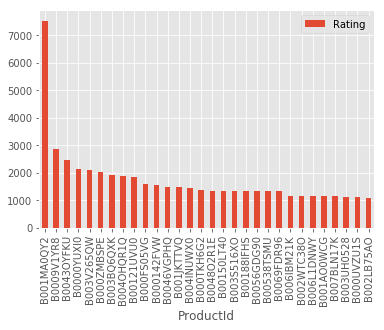

In [5]:
most_popular.head(30).plot(kind = "bar")

In [6]:
# Subset of Amazon Ratings

amazon_ratings1 = amazon_ratings.head(10000)

In [7]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId              0205616461  0558925278  0733001998  0737104473  \
UserId                                                                  
A00205921JHJK5X9LNP42           0           0           0           0   
A024581134CV80ZBLIZTZ           0           0           0           0   
A03056581JJIOL5FSKJY7           0           0           0           0   
A03099101ZRK4K607JVHH           0           0           0           0   
A0505229A7NSH3FRXRR4            0           0           0           0   

ProductId              0762451459  1304139212  1304139220  130414089X  \
UserId                                                                  
A00205921JHJK5X9LNP42           0           0           0           0   
A024581134CV80ZBLIZTZ           0           0           0           0   
A03056581JJIOL5FSKJY7           0           0           0           0   
A03099101ZRK4K607JVHH           0           0           0           0   
A0505229A7NSH3FRXRR4            0           0           0           0   

ProductId              130414643X  1304146537  ...  B000052YPE  B000052YPF  \
UserId                                         ...                           
A00205921JHJK5X9LNP42           0           0  ...           0           0   
A024581134CV80ZBLIZTZ           0           0  ...           0           0   
A03056581JJIOL5FSKJY7           0           0  ...           0           0   
A03099101ZRK4K607JVHH           0           0  ...           0           0   
A0505229A7NSH3FRXRR4            0           0  ...           0           0   

ProductId              B000052YPG  B000052YPH  B000052YPM  B000052YPU  \
UserId                                                                  
A00205921JHJK5X9LNP42           0           0           0           0   
A024581134CV80ZBLIZTZ           0           0           0           0   
A03056581JJIOL5FSKJY7           0           0           0           0   
A03099101ZRK4K607JVHH           0           0           0           0   
A0505229A7NSH3FRXRR4            0           0           0           0   

ProductId              B000052YPV  B000052YPY  B000052YQ0  B000052YQ2  
UserId                                                                 
A00205921JHJK5X9LNP42           0           0           0           0  
A024581134CV80ZBLIZTZ           0           0           0           0  
A03056581JJIOL5FSKJY7           0           0           0           0  
A03099101ZRK4K607JVHH           0           0           0           0  
A0505229A7NSH3FRXRR4            0           0           0           0  

[5 rows x 886 columns]

In [8]:
ratings_utility_matrix.shape

(9697, 886)

In [9]:
X = ratings_utility_matrix.T
X.head()

UserId      A00205921JHJK5X9LNP42  A024581134CV80ZBLIZTZ  \
ProductId                                                  
0205616461                      0                      0   
0558925278                      0                      0   
0733001998                      0                      0   
0737104473                      0                      0   
0762451459                      0                      0   

UserId      A03056581JJIOL5FSKJY7  A03099101ZRK4K607JVHH  \
ProductId                                                  
0205616461                      0                      0   
0558925278                      0                      0   
0733001998                      0                      0   
0737104473                      0                      0   
0762451459                      0                      0   

UserId      A0505229A7NSH3FRXRR4  A05492663T95KW63BR75K  \
ProductId                                                 
0205616461                     0                      0   
0558925278                     0                      0   
0733001998                     0                      0   
0737104473                     0                      0   
0762451459                     0                      0   

UserId      A059547920Q3LZVFHLPI3  A07410232KYRFR25CIUGJ  \
ProductId                                                  
0205616461                      0                      0   
0558925278                      0                      0   
0733001998                      0                      0   
0737104473                      0                      0   
0762451459                      0                      0   

UserId      A082796624UNM47DSAI6K  A0864963DOAY7LXGS5I6  ...  AZW1HXXYAC15B  \
ProductId                                                ...                  
0205616461                      0                     0  ...              0   
0558925278                      0                     0  ...              0   
0733001998                      0                     0  ...              0   
0737104473                      0                     0  ...              0   
0762451459                      0                     0  ...              0   

UserId      AZWRTJPN7NXT  AZWTXHXZXFAYP  AZYQEFB9Y5N22  AZZHB6U54UDYW  \
ProductId                                                               
0205616461             0              0              0              0   
0558925278             0              0              0              0   
0733001998             0              0              0              0   
0737104473             0              0              0              0   
0762451459             0              0              0              0   

UserId      AZZHJZP4GQPPZ  AZZNK89PXD006  AZZOFVMQC0BJG  AZZQXL8VDCFTV  \
ProductId                                                                
0205616461              0              0              0              0   
0558925278              0              0              0              0   
0733001998              0              0              0              0   
0737104473              0              0              0              0   
0762451459              0              0              0              0   

UserId      AZZTJQ7CQZUD8  
ProductId                  
0205616461              0  
0558925278              0  
0733001998              0  
0737104473              0  
0762451459              0  

[5 rows x 9697 columns]

In [10]:
X.shape

(886, 9697)

In [11]:
X1 = X

In [12]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

In [13]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

In [14]:
X.index[99]

'6117036094'

In [15]:
i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

In [16]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

In [17]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

['0733001998',
 '130414089X',
 '1304196070',
 '1457982633',
 '1987958179',
 '3423470476',
 '360211600X',
 '4057362797',
 '4057362843']

In [18]:
# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import pickle

In [19]:
product_descriptions = pd.read_csv('dataset/home-depot-product-search-relevance/product_descriptions.csv')
product_descriptions.shape

(124428, 2)

In [20]:
product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

product_uid                                product_description
0       100001  Not only do angles make joints stronger, they ...
1       100002  BEHR Premium Textured DECKOVER is an innovativ...
2       100003  Classic architecture meets contemporary design...
3       100004  The Grape Solar 265-Watt Polycrystalline PV So...
4       100005  Update your bathroom with the Delta Vero Singl...

In [21]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

In [22]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions["product_description"])
X1

<124428x268559 sparse matrix of type '<class 'numpy.float64'>'
	with 8256891 stored elements in Compressed Sparse Row format>

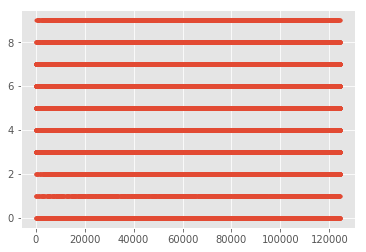

In [23]:
# # Fitting K-Means to the dataset

# X=X1

# kmeans = KMeans(n_clusters = 10, init = 'k-means++', n_init=1)
# y_kmeans = kmeans.fit_predict(X)
# plt.plot(y_kmeans, ".")
# plt.show()

# kmeans = KMeans(n_clusters = 100, init = 'k-means++', max_iter=100, n_init=10)
# y_kmeans = kmeans.fit_predict(X)
# plt.plot(y_kmeans, ".")
# plt.show()

# # true_k = 100

# # model_10 = KMeans(n_clusters=10, init='k-means++', max_iter=100, n_init=1)
# # model_10_x = model_10.fit(X1)
# # plt.plot(model_10_x, ".")
# # plt.show()
# # model_100 = KMeans(n_clusters=100, init='k-means++', max_iter=1000, n_init=1)
# # model_100_x = model_100.fit(X1)
# # plt.plot(model_100_x, ".")
# # plt.show()

# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [24]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [31]:
# # Optimal clusters is 

true_k = 100

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=1000, n_init=1)
model.fit(X1)
pickle.dump(model, open("save_new2.pkl", "wb"))

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 mirror
 wood
 frame
 wall
 vertically
 glass
 finish
 bathroom
 hardware
 beveled
Cluster 1:
 post
 fence
 gate
 vinyl
 posts
 rail
 veranda
 maintenance
 railing
 fencing
Cluster 2:
 socket
 drive
 sockets
 steel
 screws
 screw
 point
 16
 head
 strength
Cluster 3:
 pvc
 sch
 40
 pipe
 grade
 furniture
 applications
 pressure
 plumbing
 solvent
Cluster 4:
 panels
 tin
 ceiling
 ft
 backsplash
 panel
 wall
 look
 fasade
 cut
Cluster 5:
 moulding
 mouldings
 primed
 wood
 ready
 paint
 used
 painted
 pine
 proposition
Cluster 6:
 surfaces
 paint
 use
 adhesive
 wood
 tape
 sanding
 formula
 concrete
 surface
Cluster 7:
 bits
 bit
 drill
 drilling
 carbide
 shank
 tip
 sds
 flute
 holes
Cluster 8:
 tile
 piece
 indoor
 recommended
 residential
 wall
 thinset
 frost
 pieces
 ceramic
Cluster 9:
 carpet
 rug
 stain
 wear
 pad
 100
 fibers
 texture
 lifeproof
 rugs
Cluster 10:
 used
 proposition
 nbsp
 residents
 california
 65
 lag
 bolt
 hole
 head
Cluste

In [26]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [27]:
show_recommendations("cutting tool")

Cluster 15:
 blade
 cutting
 blades
 saw
 cut
 cuts
 tooth
 teeth
 carbide
 steel


In [28]:
show_recommendations("spray paint")

Cluster 76:
 spray
 rust
 paint
 oleum
 oz
 formula
 sq
 finger
 touch
 primer


In [29]:
show_recommendations("steel drill")

Cluster 30:
 bit
 drill
 drilling
 carbide
 bits
 shank
 flute
 sds
 hammer
 tip


In [30]:
show_recommendations("water")

Cluster 74:
 water
 filter
 heater
 valve
 hot
 flow
 tank
 pressure
 chlorine
 gal
